In [1]:
# Part 1 Data Preprocessing

# Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing Dataset
dataset_train = pd.read_csv('train.csv')
train_dataset = dataset_train.iloc[:, 1:2].values

In [3]:
train_dataset.shape

(3273, 1)

In [5]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_dataset_scaled = sc.fit_transform(train_dataset)

In [6]:
X_train = []
y_train = []

for i in range(60, 3273):
    X_train.append(train_dataset_scaled[i-60: i, 0])
    y_train.append(train_dataset_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train.shape

(3213, 60, 1)

In [7]:
# Part -2 Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile('adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, batch_size=32, epochs=50)

Using TensorFlow backend.


Epoch 1/50
3213/3213 [==============================] - 17s 5ms/step - loss: 0.0106
Epoch 2/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0021
Epoch 3/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0022
Epoch 4/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0018
Epoch 5/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0019
Epoch 6/50
3213/3213 [==============================] - 15s 5ms/step - loss: 0.0015
Epoch 7/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0014
Epoch 8/50
3213/3213 [==============================] - 15s 5ms/step - loss: 0.0012
Epoch 9/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0014
Epoch 10/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0013
Epoch 11/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0013
Epoch 12/50
3213/3213 [==============================] - 14s 4ms/step - lo

In [8]:
dataset_test = pd.read_csv('test.csv')
real_values = dataset_test.iloc[:, 1:2].values

In [9]:
real_values.shape

(233, 1)

In [10]:
# Part -3 Predicting results


dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

dataset_total = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

dataset_total = dataset_total.reshape(-1, 1)

X_test = []

for i in range(60, 233):
    X_test.append(dataset_total[i-60: i, 0])

X_test = np.array(X_test)

X_test = sc.transform(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred = regressor.predict(X_test)

pred = sc.inverse_transform(pred)

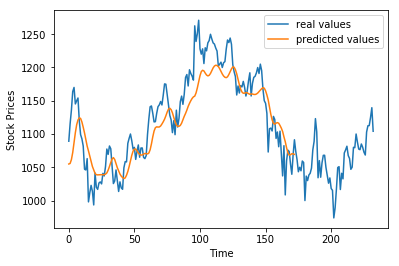

In [11]:
# Visualising Results
plt.plot(real_values, label = 'real values')
plt.plot(pred, label = 'predicted values')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()